<a href="https://colab.research.google.com/github/SHRAVAN-AMBEER/Machine-Learning-Lab/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of X_train: (537, 7)
Shape of y_train: (537,)
Accuracy: 0.6666666666666666


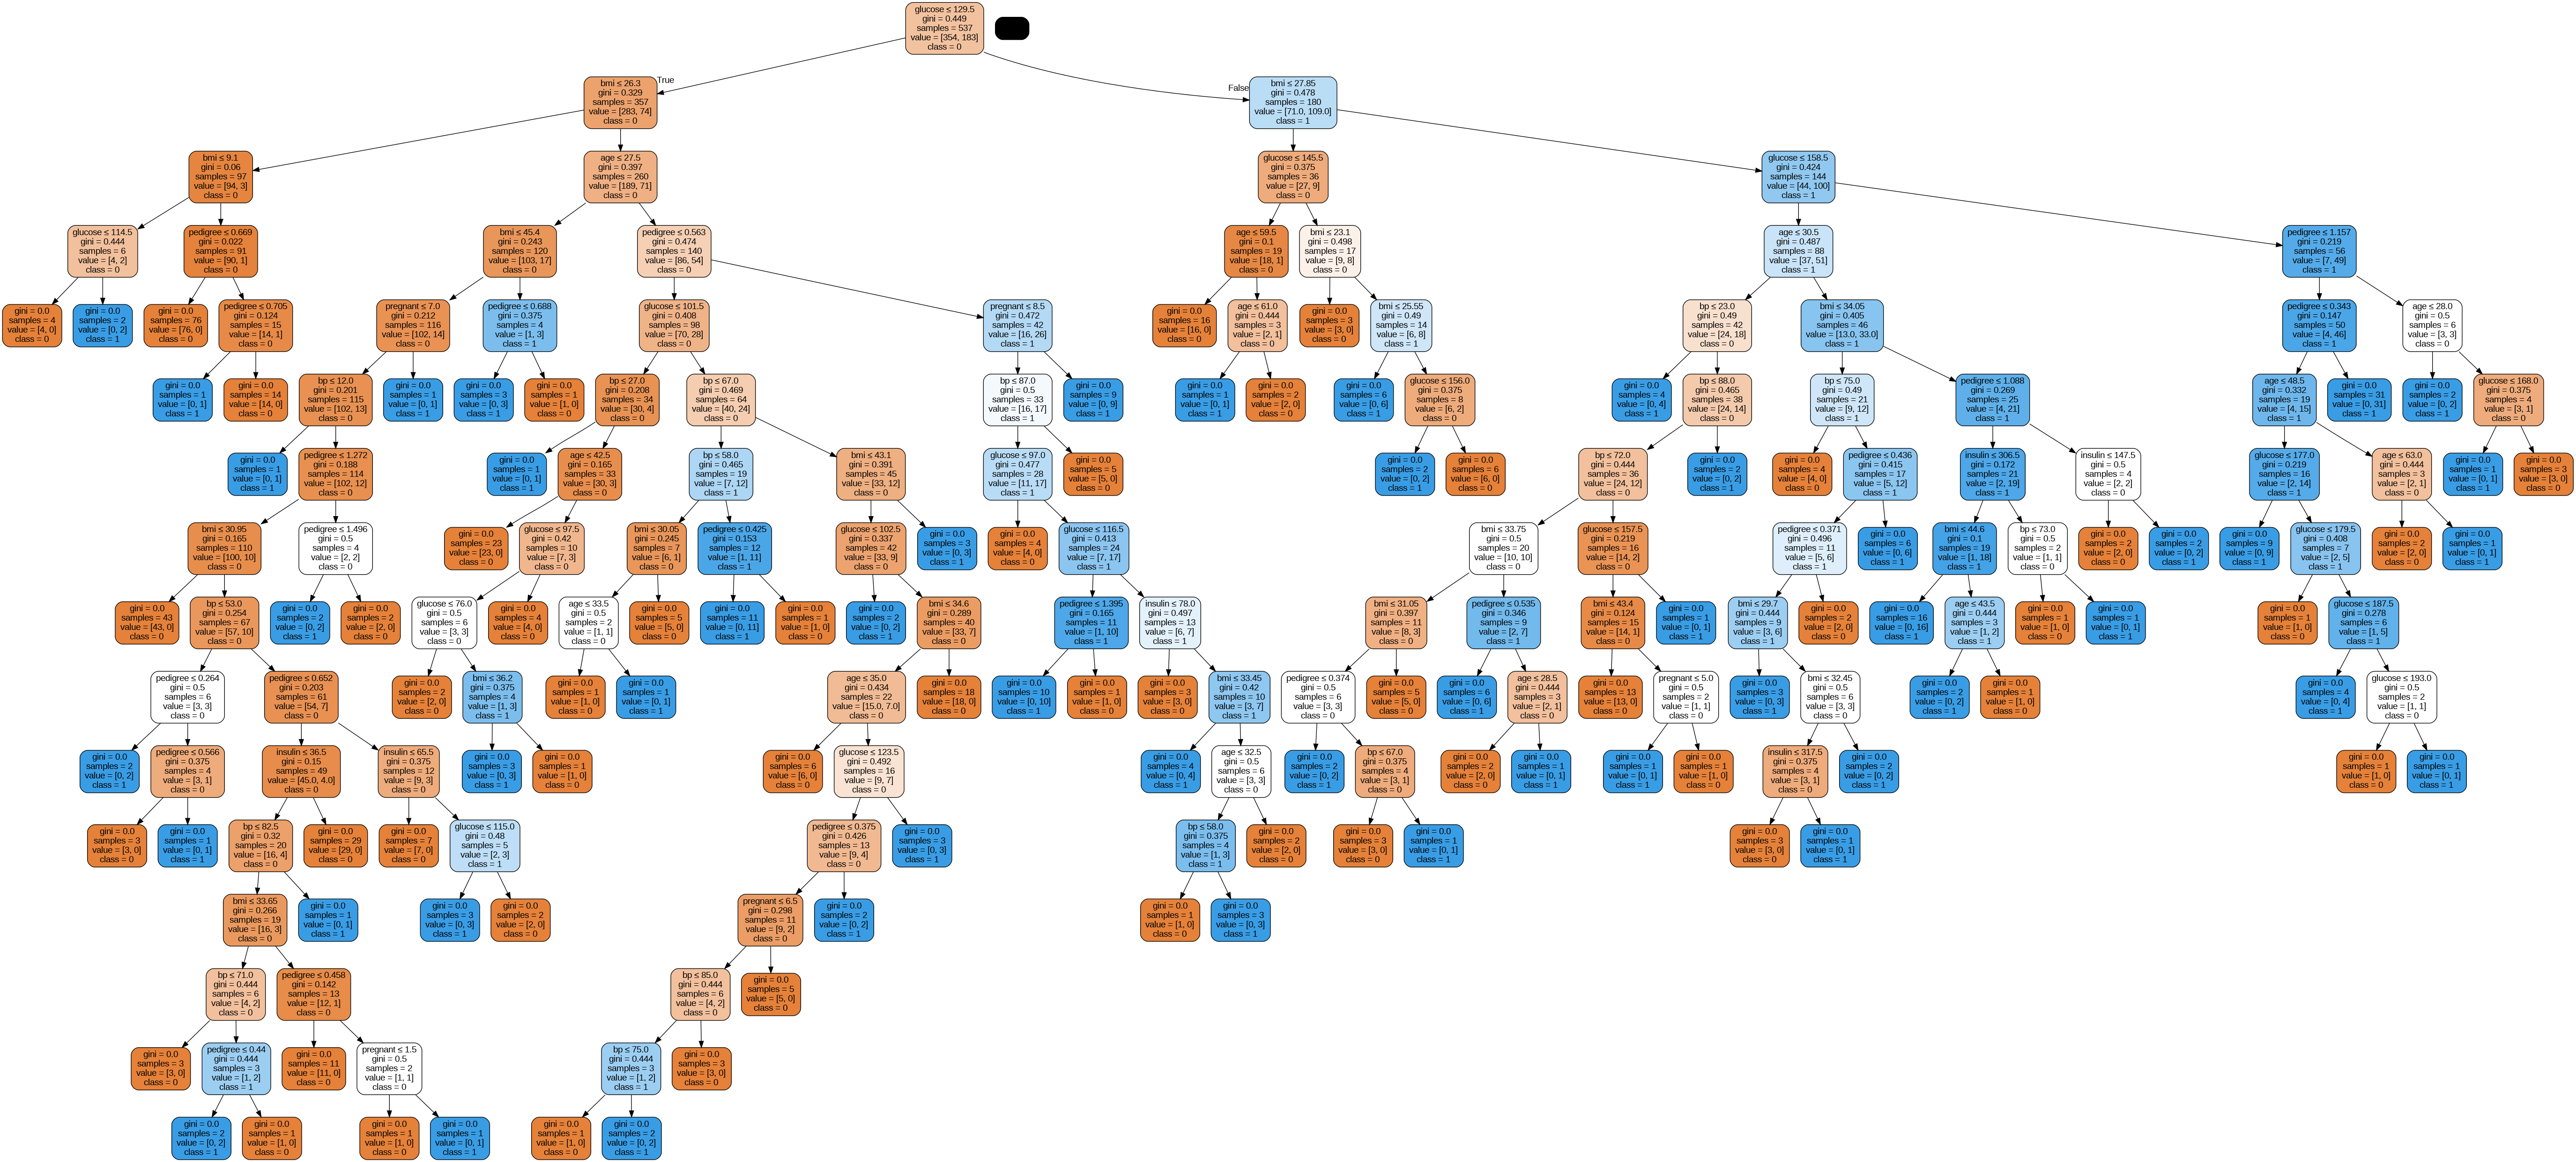

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
import six
from IPython.display import Image
import pydotplus
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi',
'pedigree', 'age', 'label']

# load dataset

pima = pd.read_csv("/content/drive/MyDrive/Machine Learning /ML LAB /Datasets/diabetes_DT.csv",
names=col_names, skiprows=1)

pima.head()
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

X = pima[feature_cols] # Features

y = pima.label # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


dot_data = six.StringIO()

export_graphviz(clf, out_file=dot_data,

filled=True, rounded=True,

special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('diabetes.png')

Image(graph.create_png())

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
print("feaures",iris.feature_names)
print("labels",iris.target_names)
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3,random_state=109)

feaures ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
labels ['setosa' 'versicolor' 'virginica']


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("precision:", metrics.precision_score(y_test, y_pred, pos_label=1))
print("Recall:",metrics.recall_score(y_test,y_pred, pos_label=1))

Accuracy: 0.7835497835497836
precision: 0.7868852459016393
Recall: 0.5647058823529412


In [ ]:
import numpy as np
from collections import Counter
def euclidean_distance(point1,point2):
  return np.sqrt(np.sum((np.array(point1)-np.array(point2)))**2)
def knn_predict(training_data, training_labels, test_point, k):
  distances = []
  for i in range(len(training_data)):
    dist = euclidean_distance(test_point, training_data[i])
    distances.append((dist, training_labels[i]))
  distances.sort(key=lambda x: x[0])
  k_nearest_labels = [label for _, label in distances[:k]]
  return Counter(k_nearest_labels).most_common(1)[0][0]

training_data = [[1,2],[2,3],[3,4],[6,7],[7,8]]
training_labels = ['A','A','A','B','B']
test_point = [4,5]
k=3
prediction = knn_predict(training_data, training_labels, test_point, k)
print("prediction: " ,prediction)

prediction:  A
